In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.interpolate import RegularGridInterpolator
plt.rcParams["figure.figsize"] = (10, 10)
%matplotlib inline
r = np.random

def lin(x, a,b,c,d,e):
    return np.where(x<c, 1, a*(x-c)**d+b*(x-c)+e)

## 1D raindrop surface, just code

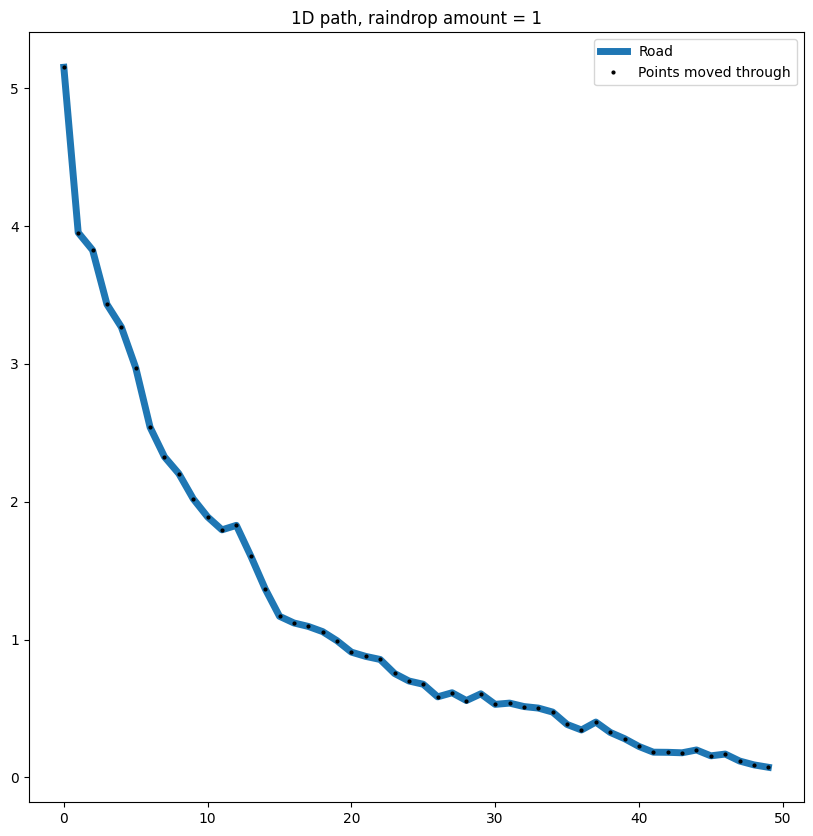

1

In [2]:

def rain1d(N,expdis,quick = True, plot = True):
    change = True
    End = False
    index0 = 0
    x0 = expdis[index0]
    xlist = [x0]
    min_diff0 = 10e-2
    min_diff = np.copy(min_diff0)
    raindrops = 1
    start = 0
    water_amount = 1
    if quick:
        while not End:
            if index0 +1 == len(expdis):
                End = True
            elif expdis[index0+1] < x0+min_diff*water_amount:
                index0 += 1
                x0 = expdis[index0]
                change = True
                xlist.append(x0)
                min_diff = min_diff0
                water_amount = 1
            elif expdis[index0+1] > x0+min_diff*water_amount:
                water_amount += 1
                raindrops += 1
        #timespace = np.arange(start,len(xlist),1)
       
        if plot:
            plt.plot(range(len(xlist)),xlist, '-', linewidth = 5,label = 'Road')
            plt.plot(range(len(xlist)),xlist,'o', markersize = 2,color = "black", label = 'Points moved through')
            plt.title(f'1D path, raindrop amount = {raindrops}')
            plt.legend()
            plt.show()
    else:
        while not End:
            while change:
                change = False
                if index0 +1 == len(expdis):
                    break
                elif expdis[index0+1] < x0+min_diff:
                    index0 += 1
                    x0 = expdis[index0]
                    change = True
                    xlist.append(x0)
                    min_diff = min_diff0
            timespace = np.arange(start,len(xlist),1)
            plt.plot(timespace,xlist[start:], '--', label = f'Raindrop = {raindrops}')
            plt.title(f'Amount of raindrops needed before reaching the end: {raindrops}')
            if expdis[-1] == xlist[-1]:
                End = True
                change = False
                plt.title(f'Amount of raindrops needed before reaching the end: {raindrops}')
            else: 
                start = len(xlist)-1
                while expdis[index0+1] > x0+min_diff:   
                    min_diff +=min_diff0
                    raindrops += 1
                change = True
        plt.plot(expdis, '.', color = "black")    
        plt.legend()
        if plot:
            plt.show()
        else:
            plt.close()
    return raindrops
def fittingthing():
    alist = []
    blist = []
    clist = []
    dlist = []
    elist = []
    nrange = np.arange(10,30,5)
    for N in nrange:
        raintemp = []
        rainamount = []
        noiserange = np.arange(0.001,1,0.001)
        for noisesize in noiserange:
            for i in range(1000):
                raintemp.append(rain1d(N,expdis, quick = True, plot = False))
                expdis = noisesize*r.uniform(size = N) + np.flip(np.sort(r.exponential(1,size = N)))
            rainamount.append(np.mean(raintemp))
        sy = np.std(raintemp)
        chi2expo = LeastSquares(noiserange, rainamount, sy, lin)
        m = Minuit(chi2expo, a = 1,b = 1,c = 0.1,d = 1,e = 1)
        m.migrad(ncall = 50000)
        alist.append(m.values['a'])
        blist.append(m.values['b'])
        clist.append(m.values['c'])
        dlist.append(m.values['d'])
        elist.append(m.values['e'])
    plt.plot(nrange,alist, label = 'a')
    plt.plot(nrange,blist, label = 'b')
    plt.plot(nrange,clist, label = 'c')
    plt.plot(nrange,dlist, label = 'd')
    plt.plot(nrange,elist, label = 'e')
    plt.legend()
    plt.show()
    plt.plot(noiserange,rainamount, '.', label = 'Data')
    plt.plot(noiserange, lin(noiserange, *m.values), label = 'Fit')
    plt.title('Amount of raindrops needed before reaching the end')
    plt.xlabel('Fluctuation size on plane surface')
    plt.ylabel('Amount of raindrops')
    plt.show()
N = 50
noisesize = 0.1
expdis = noisesize*r.uniform(0,1,size = N) + np.flip(np.sort(r.exponential(1,size = N)))
rain1d(N,expdis, quick = True, plot = True)

## 2D raindrop surface

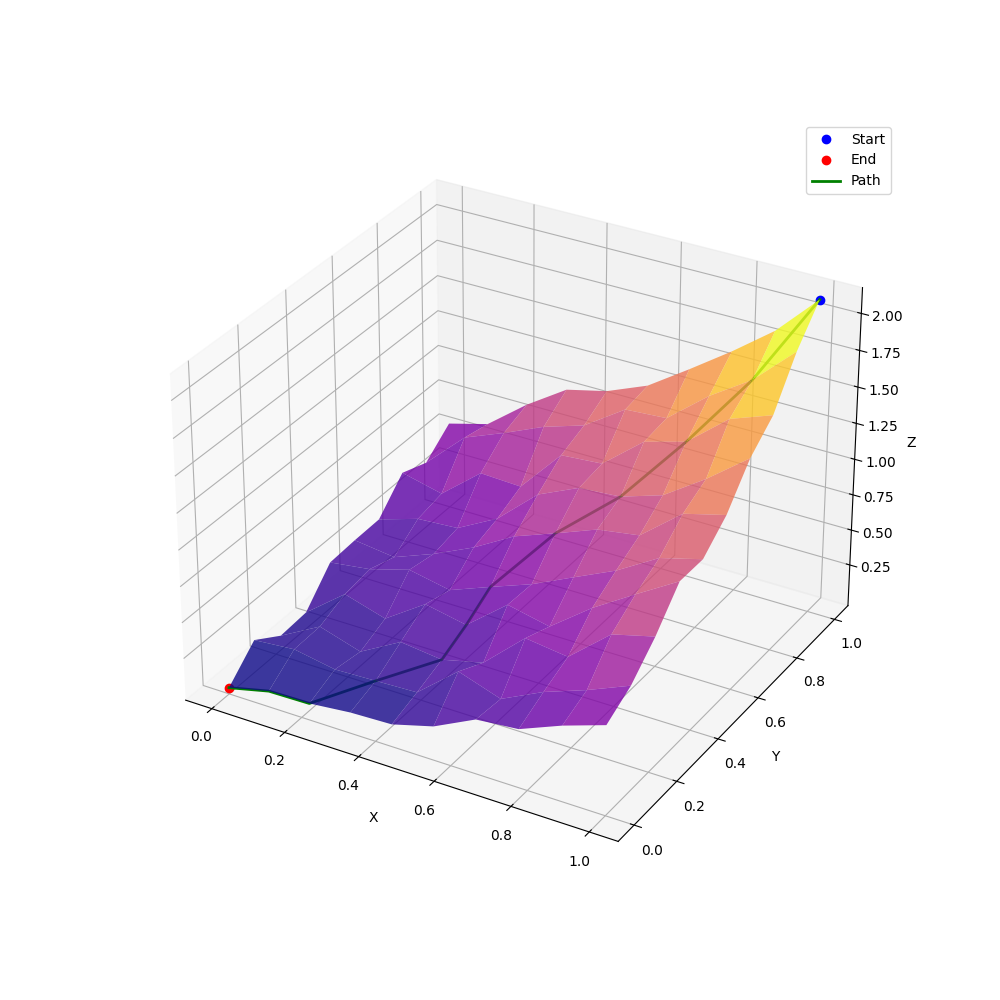

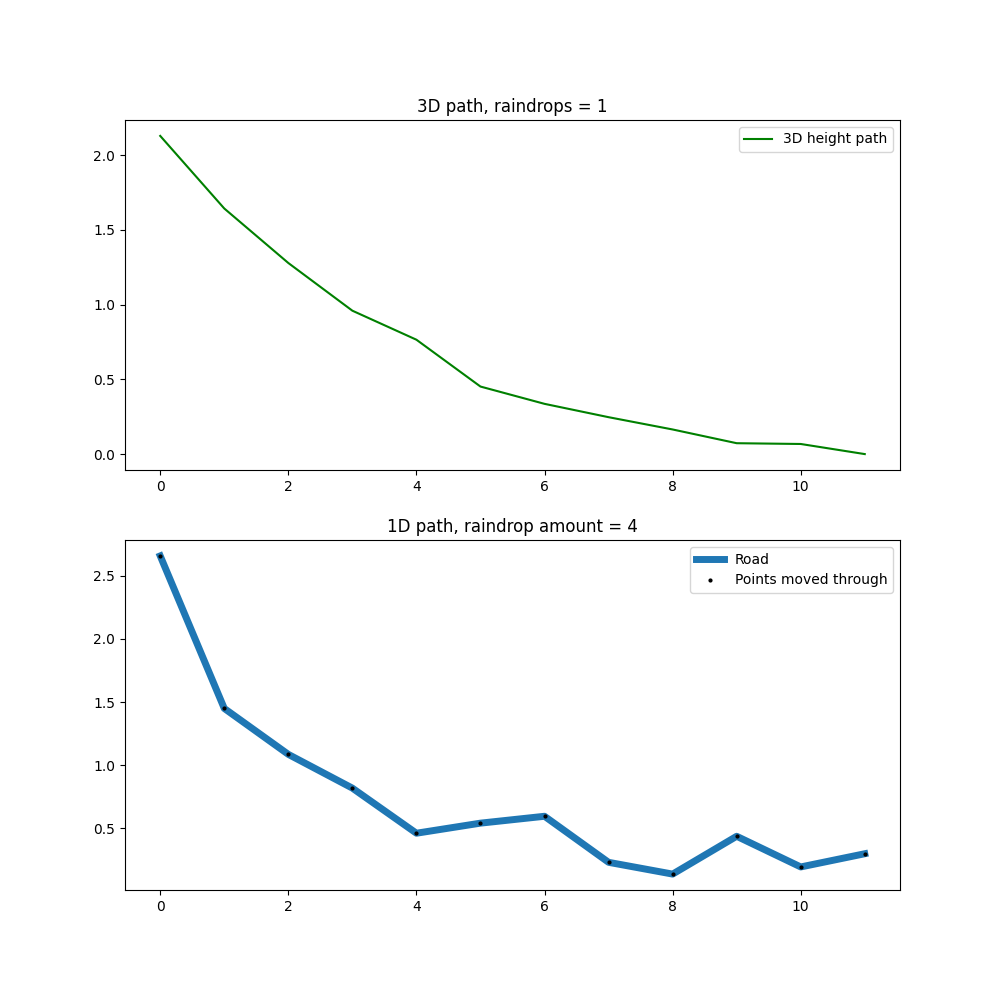

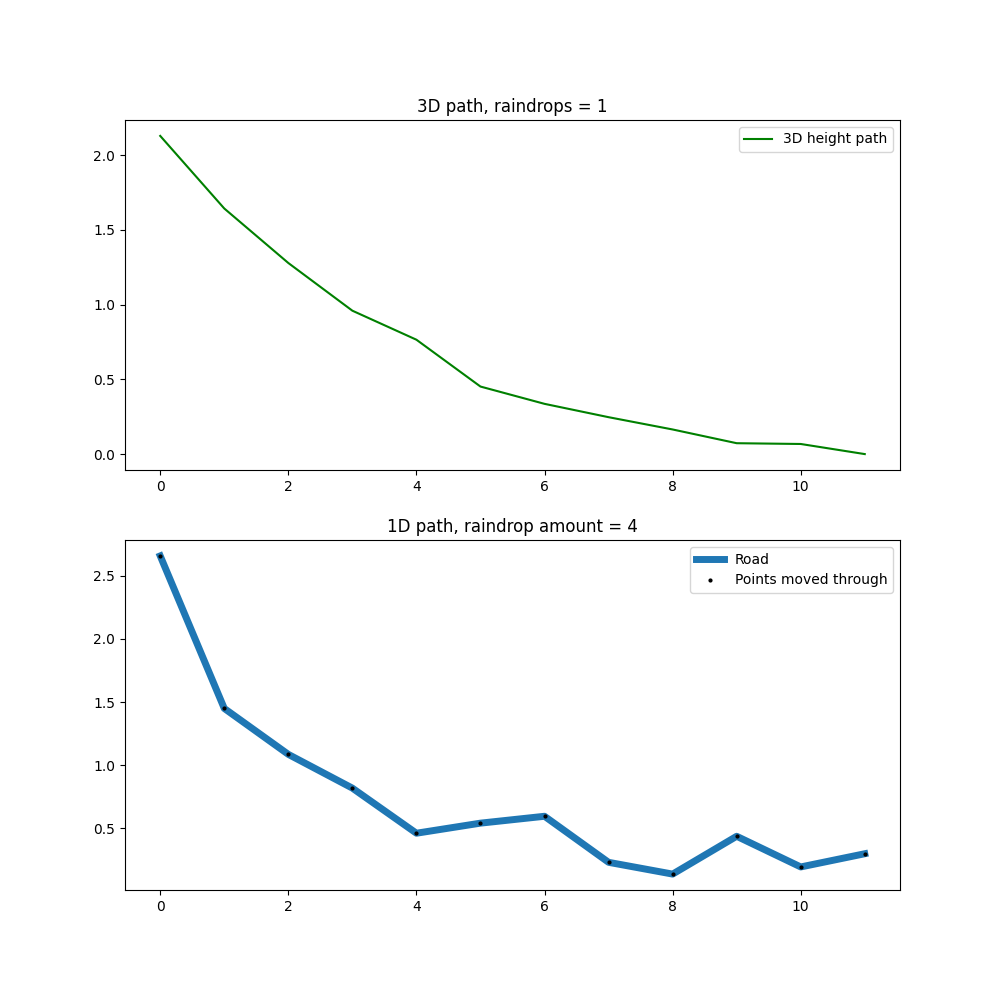

In [57]:
plt.close('all')
%matplotlib widget
N = 10
maxnoise = 1
noise_significance = 0.2
xaxis = np.linspace(0,1,N)
yaxis = np.linspace(0,1,N)
X,Y = np.meshgrid(xaxis,yaxis)
noise = r.uniform(0,maxnoise, size = (N,N))
Z = 0.5*(X+Y)**2+ (noise_significance * noise)
startpoint = np.unravel_index(np.argmax(Z), Z.shape)
Endpoint =  np.unravel_index(np.argmin(Z), Z.shape)
StartX =X[startpoint]
StartY = Y[startpoint]
StartZ = Z[startpoint]
EndX =X[Endpoint]
EndY = Y[Endpoint]
EndZ = Z[Endpoint]

currentpoint = startpoint
path = [currentpoint]
neighbor_vals = [Z[currentpoint]]
neighbor_coords = [currentpoint]
while currentpoint != Endpoint: #\
    i,j = currentpoint 
    if i+1 < N and j+1 < N:
        neighbors = [(i+1,j),(i,j+1),(i+1,j+1),(i+1,j-1),(i-1,j+1),(i-1,j),(i,j-1),(i-1,j-1)]
    elif i+1 < N:
        neighbors = [(i+1,j),(i+1,j-1),(i-1,j),(i-1,j-1),(i,j-1)]
    elif j+1 < N:
        neighbors = [(i,j+1),(i-1,j-1),(i-1,j),(i-1,j+1),(i,j-1)]
    else:
        neighbors = [(i-1,j),(i-1,j-1),(i,j-1)]
    valid_neighbors = [point for point in neighbors if point not in path and 0 <= point[0] < N and 0 <= point[1] < N]

    Zneighbors = [Z[point] for point in valid_neighbors]
    next_point = valid_neighbors[np.argmin(Zneighbors)]
    path.append(next_point)
    currentpoint = next_point
 
path_x = [X[p] for p in path]
path_y = [Y[p] for p in path]
path_z = [Z[p] for p in path]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, cmap='plasma', alpha = 0.8)
ax.plot(StartX,StartY,StartZ, 'o', color = "Blue", label = "Start")
ax.plot(EndX,EndY,EndZ, 'o', color = "Red", label = "End")
ax.plot(path_x, path_y, path_z, color="green", label="Path", linewidth=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()
N = len(path_z)
noisesize = 0.4
min_diff0 = 10e-2
a = [size_diff for size_diff in np.diff(path_z)]
raindropamount = 1
for i in range(len(a)):
    if a[i] > 0:
        raindropamount += np.ceil(a[i]/min_diff0)
fig,ax = plt.subplots(2,1, figsize = (10,10))
expdis = noisesize*r.uniform(size = N) + np.flip(np.sort(r.exponential(1,size = N)))
ax[0].plot(range(len(path_z)), path_z, '-',label='3D height path', color='green')
ax[0].set_title(f'3D path, raindrops = {raindropamount:.0f}',)
ax[0].legend()
rain1d(N, expdis, quick = True, plot = True)
plt.show()

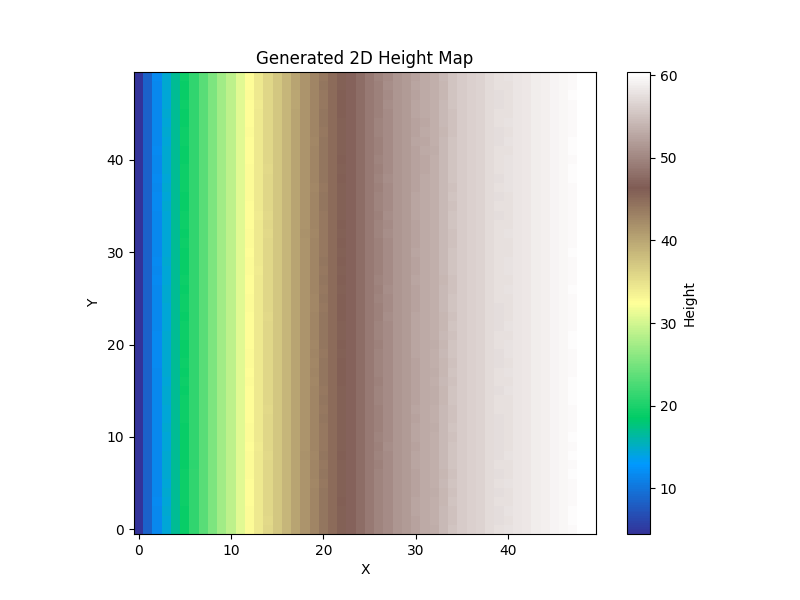

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 50  # Size of the grid (N x N)
noisesize = 0.5  # Noise scaling factor

# Generate the theoretical ΔZ
np.random.seed(42)  # For reproducibility
r = np.random
deltas = noisesize * r.uniform(0, 1, size=N) + np.flip(np.sort(r.exponential(1, size=N)))

# Create a 1D height profile by cumulative summation
baseline = np.cumsum(deltas)

# Initialize the 2D height map
Z = np.zeros((N, N))

# Populate the 2D height map by varying the baseline profile
for i in range(N):
    row_noise = noisesize * r.uniform(-0.1, 0.1, size=N)  # Add some variation across rows
    Z[i, :] = baseline + row_noise

# Visualize the height map
plt.figure(figsize=(8, 6))
plt.imshow(Z, cmap='terrain', origin='lower')
plt.colorbar(label='Height')
plt.title('Generated 2D Height Map')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
